In [15]:
import random, pylab, numpy

In [16]:
#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers
pylab.rcParams['lines.markersize'] = 10
#set number of examples shown in legends
pylab.rcParams['legend.numpoints'] = 1

In [17]:
def rSquared(observed, predicted):
    error = ((predicted - observed)**2).sum()
    meanError = error/len(observed)
    return 1 - (meanError/numpy.var(observed))

In [18]:
def genFits(xVals, yVals, degrees):
    models = []
    for d in degrees:
        model = pylab.polyfit(xVals, yVals, d)
        models.append(model)
    return models

In [19]:
def testFits(models, degrees, xVals, yVals, title):
    pylab.plot(xVals, yVals, 'o', label = 'Data')
    for i in range(len(models)):
        estYVals = pylab.polyval(models[i], xVals)
        error = rSquared(yVals, estYVals)
        pylab.plot(xVals, estYVals,
                   label = 'Fit of degree '\
                   + str(degrees[i])\
                   + ', R2 = ' + str(round(error, 5)))
    pylab.legend(loc = 'best')
    pylab.title(title)

In [20]:
def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline() #discard header
    for line in dataFile:
        d, m = line.split()
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)

In [21]:
def labelPlot():
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')

def plotData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81  #acc. due to gravity
    pylab.plot(xVals, yVals, 'bo',
               label = 'Measured displacements')
    labelPlot()

In [22]:
def fitData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81 #get force
    pylab.plot(xVals, yVals, 'bo',
               label = 'Measured points')                 
    model = pylab.polyfit(xVals, yVals, 1)
    xVals = xVals + [2]
    yVals = yVals + []
    estYVals = pylab.polyval(model, xVals)
    pylab.plot(xVals, estYVals, 'r',
               label = 'Linear fit, r**2 = '
               + str(round(rSquared(yVals, estYVals), 5)))                
    model = pylab.polyfit(xVals, yVals, 2)
    estYVals = pylab.polyval(model, xVals)
    pylab.plot(xVals, estYVals, 'g--',
               label = 'Quadratic fit, r**2 = '
               + str(round(rSquared(yVals, estYVals), 5)))
    pylab.title('A Linear Spring')
    labelPlot()
    pylab.legend(loc = 'best')

In [23]:
random.seed(0)

In [24]:
class tempDatum(object):
    def __init__(self, s):
        info = s.split(',')
        self.high = float(info[1])
        self.year = int(info[2][0:4])
    def getHigh(self):
        return self.high
    def getYear(self):
        return self.year

In [25]:
def getTempData():
    inFile = open('temperatures1.csv')
    data = []
    for l in inFile:
        data.append(tempDatum(l))
    return data

In [26]:
def getYearlyMeans(data):
    years = {}
    for d in data:
        try:
            years[d.getYear()].append(d.getHigh())
        except:
            years[d.getYear()] = [d.getHigh()]
    for y in years:
        years[y] = sum(years[y])/len(years[y])
    return years

Text(0.5, 1.0, 'Select U.S. Cities')

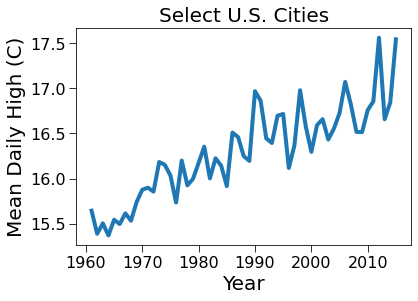

In [27]:
data = getTempData()
years = getYearlyMeans(data)
xVals, yVals = [], []
for e in years:
    xVals.append(e)
    yVals.append(years[e])
pylab.plot(xVals, yVals)
pylab.xlabel('Year')
pylab.ylabel('Mean Daily High (C)')
pylab.title('Select U.S. Cities')

In [28]:
def splitData(xVals, yVals):
    toTrain = random.sample(range(len(xVals)),
                            len(xVals)//2)
    trainX, trainY, testX, testY = [],[],[],[]
    for i in range(len(xVals)):
        if i in toTrain:
            trainX.append(xVals[i])
            trainY.append(yVals[i])
        else:
            testX.append(xVals[i])
            testY.append(yVals[i])
    return trainX, trainY, testX, testY

In [29]:
##UNCOVER FOR SECOND DEMO    
numSubsets = 10
dimensions = (1, 2, 3, 4)
rSquares = {}
for d in dimensions:
    rSquares[d] = []
        
for f in range(numSubsets):
    trainX, trainY, testX, testY = splitData(xVals, yVals)
    for d in dimensions:
        model = pylab.polyfit(trainX, trainY, d)
        estYVals = pylab.polyval(model, trainX) #polyval estimate y values as list
        estYVals = pylab.polyval(model, testX)
        rSquares[d].append(rSquared(testY, estYVals))
print('Mean R-squares for test data')
for d in dimensions:
    mean = round(sum(rSquares[d])/len(rSquares[d]), 4)
    sd = round(numpy.std(rSquares[d]), 4)
    print('For dimensionality', d, 'mean =', mean,
          'Std =', sd)
print(rSquares[1])

Mean R-squares for test data
For dimensionality 1 mean = 0.7535 Std = 0.0656
For dimensionality 2 mean = 0.7291 Std = 0.0744
For dimensionality 3 mean = 0.7039 Std = 0.0684
For dimensionality 4 mean = 0.7169 Std = 0.0777
[0.7828002156420483, 0.8063796402505176, 0.7963713275727426, 0.7843388574321191, 0.7600111202485312, 0.5708893650703397, 0.7211540856258911, 0.7435827676214933, 0.7903145537514858, 0.7792023858639963]
